# 📂 Resume Classifier with NLP

## 📘 1. Project Overview

This project aims to build a model capable of classifying resumes into job-related categories using Natural Language Processing (NLP). It will use supervised learning to predict the appropriate category of a resume based solely on its text content.

## 🎯 2. Objectives

- Load and explore a dataset of resumes
- Clean and preprocess the text data
- Vectorize the resumes into numerical features
- Train a classification model
- Evaluate model performance
- Visualize and interpret key results

## 🧾 3. Dataset Information

- **Source**: [[Link to dataset](https://www.kaggle.com/datasets/youssefkhalil/resumes-images-datasets/data)]
- **Fields**:
  - `Category`: Resume category label (e.g., IT, HR, Sales)
  - `Text`: Full resume content

In [1]:
import os
import kagglehub

# root directory for kaggle datasets (using expanduser to not depend on current working directory)
dataset_dir = os.path.expanduser("~/.cache/kagglehub/datasets/youssefkhalil/resumes-images-datasets/versions/1")

# Download latest version
# Verify if dataset is already exist
if not os.path.exists(dataset_dir):
    path = kagglehub.dataset_download("youssefkhalil/resumes-images-datasets")
    print("Dataset downloaded to:", path)
else:
    print("Dataset already exists at:", dataset_dir)

Dataset already exists at: C:\Users\maxim/.cache/kagglehub/datasets/youssefkhalil/resumes-images-datasets/versions/1


c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Verify if the specific path exists
import os

path_test = r"C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database"
print("Path used:")
print(path_test)
print("\n Does the path exist?", os.path.exists(path_test))
print(" Is it a directory?", os.path.isdir(path_test))

Path used:
C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database

 Does the path exist? True
 Is it a directory? True


In [3]:
# Take a look of what is inside the directory
print("\nFiles in the directory resume_database:")
print(os.listdir(path_test))


Files in the directory resume_database:
['Accountant', 'Advocate', 'Agricultural', 'Arts', 'Aviation', 'Banking', 'Consultant', 'Data Science', 'Database', 'Designer', 'DevOps Engineer', 'Digital Media', 'Education', 'ETL Developer', 'Human Resources', 'Information Technology', 'Management', 'Python Developer', 'React Developer', 'SAP Developer', 'Testing']


In [4]:
# Loop through only one subfolder as test (Data Science)
test_subfolder = os.path.join(path_test, "Data Science")
print("\nDoes Data Science's folder exist?", os.path.exists(test_subfolder))

files = os.listdir(test_subfolder)
print("\nFiles in the Data Science folder:", files[:5])


Does Data Science's folder exist? True

Files in the Data Science folder: ['0.docx', '0.png', '1.docx', '1.png', '10.docx']


In [5]:
# Verify if reconized file extensions correctly
valid_extensions = ['.docx', '.pdf', '.png', '.jpg', '.jpeg']

valid_files = [f for f in files if os.path.splitext(f)[1].lower() in valid_extensions]
print("\nValid files in the Data Science folder:", valid_files[:5])
print("Number of valid files:", len(valid_files))


Valid files in the Data Science folder: ['0.docx', '0.png', '1.docx', '1.png', '10.docx']
Number of valid files: 400


In [6]:
import pandas as pd

# list of data
data = []

# iterate through all files in the directory
for root, dirs, files in os.walk(path_test):
    print(f'exploring {root}')
    for file in files:
        ext = os.path.splitext(file)[1]
        if ext in valid_extensions:
            file_path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(file_path))
            print(f"Valid file found: {file_path}")
            data.append({
                "file_path": file_path.replace("\\", "/"),
                "label": label,
                "extension": ext.lower()
            })
            
# Create a DataFrame from the data
df = pd.DataFrame(data)

print(f"\n Total valid files found: {len(df)}")

if len(df) > 0:
    display(df.sample(5))
else:
    print("No valid files found")

exploring C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database
exploring C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\0.docx
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\0.png
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\1.docx
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\1.png
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-d

,file_path,label,extension
317,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Accountant,.png
79,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Accountant,.png
512,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Advocate,.png
249,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Accountant,.png
3064,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Designer,.png


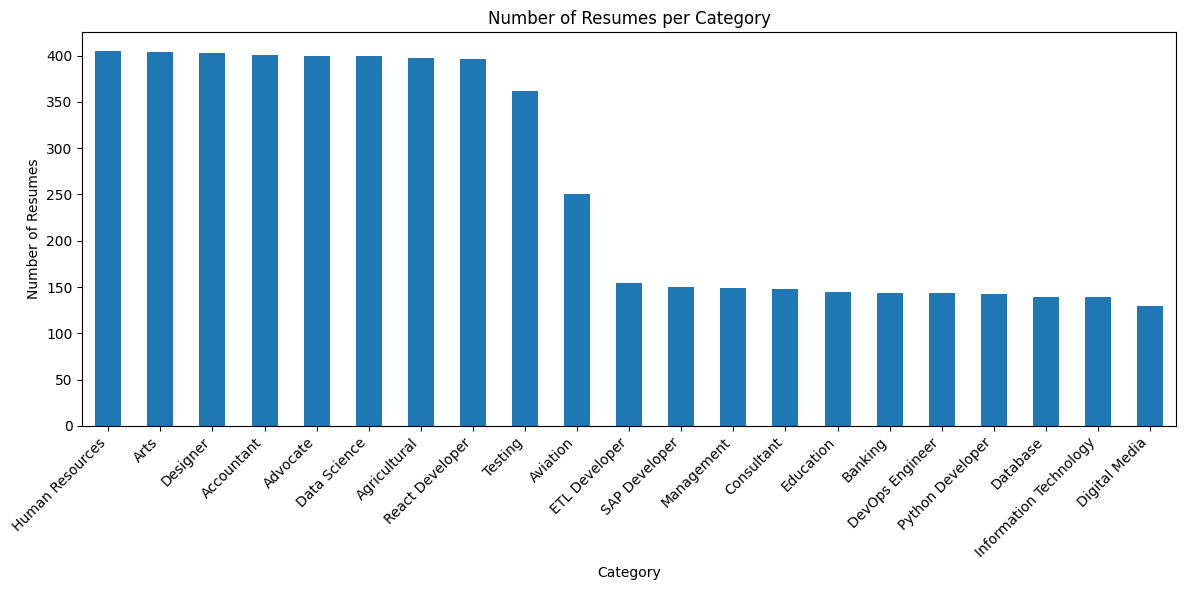

In [7]:
# Graphic if number of Resumes vs Category
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df['label'].value_counts().plot(kind='bar')
plt.title('Number of Resumes per Category')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
#This script doesn't work correctly, it was fixed with the code above.

#import os
#import pandas as pd
# Alternative root directory for datasets
#base_path = os.path.join("resumes-images-datasets", "versions", "1", "Resumes Datasets", "resume_database")

#print("Base path to use:", base_path)
#print("Does the folder exist?", os.path.exists(base_path))

# Validate extension of files
#valid_extensions = ['.docx', '.pdf', '.png', '.jpg', '.jpeg',
#                    '.DOCX', '.PDF', '.PNG', '.JPG', '.JPEG']

# list of data
#data = []

# iterate through all files in the directory
#for root, dirs, files in os.walk(base_path):
#    print(f'exploring {root}')
#    for file in files:
#        ext = os.path.splitext(file)[1]
#        if ext in valid_extensions:
#            file_path = os.path.join(root, file)
#            label = os.path.basename(os.path.dirname(file_path))
#            print(f"Valid file found: {file_path}")
#            data.append({
#                "file_path": file_path.replace("\\", "/"),
#                "label": label,
#                "extension": ext.lower()
#            })
            
# Create a DataFrame from the data
#df = pd.DataFrame(data)

#print(f"\n Total valid files found: {len(df)}")

#if len(df) > 0:
#    display(df.sample(5))
#else:
#    print("No valid files found")

In [9]:
# Count of extensions
from collections import Counter
import os

# Extension count
ext_counts = Counter()

# Loop through dataset
for root, dirs, files in os.walk(path_test):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        ext_counts[ext]+=1

# Display counts
for ext, count in ext_counts.items():
    print(f"Extension: {ext}, Count: {count}")

Extension: .docx, Count: 1821
Extension: .png, Count: 3581


## 🔍 4. Initial Exploration

Here we inspect the size of the dataset, class distribution, and look at a few examples.

In [10]:
%pip install python-docx

from docx import Document
import pandas as pd
import os
from tqdm import tqdm

# Filter the DataFrame to only include .docx files
docx_df = df[df['extension']== '.docx'].copy()

# Function to extract text from .docx files
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        text = "\n".join([para.text for para in doc.paragraphs])
        return text.strip()
    except Exception as e:
        print(f'Error reading {file_path}: {e}')
        return ""
    
# Apply the function to all .docx files
tqdm.pandas(desc="Extracting text from .docx files")
docx_df['text'] = docx_df['file_path'].progress_apply(extract_text_from_docx)

# Show some results
docx_df.sample(3)[['file_path', 'label', 'text']]

Note: you may need to restart the kernel to use updated packages.


Extracting text from .docx files: 100%|██████████| 1821/1821 [01:11<00:00, 25.43it/s]


,file_path,label,text
599,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Advocate,JESSICA CLAIRE\nresumesample@example.com\n(555...
1554,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Arts,SUMMARY\nJessica Claire\n100 Montgomery St. 10...
66,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Accountant,SUMMARY\nJessica Claire\n100 Montgomery St. 10...


In [11]:
# Create a new DataFrame with the extracted text
from docx import Document
from tqdm import tqdm

# Add column for text extraction
texts=[]

for row in tqdm(df.itertuples(), total=len(df)):
    if row.extension == '.docx':
        try:
            doc = Document(row.file_path)
            full_text = "\n".join([p.text for p in doc.paragraphs])
            texts.append(full_text)
        except Exception as e:
            print(f"Error reading {row.file_path}: {e}")
            texts.append("")
    else:
        texts.append("")

# Add the new column
df['text'] = texts

# Drop rows with empty text
df = df[df['text'].str.strip() != ""]

# Display some samples
df[['label', 'text']].sample(3).to_string()

  0%|          | 0/5402 [00:00<?, ?it/s]

100%|██████████| 5402/5402 [00:33<00:00, 159.59it/s] 


'                label                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## 🧹 5. Text Cleaning & Preprocessing

- Lowercasing
- Removing punctuation
- Removing stopwords
- Stemming or Lemmatization
- Tokenization

In [12]:
%pip install nltk

import pandas as pd
import re
import string 
import nltk
from nltk.corpus import stopwords

# Download stopwords, if not already present
nltk.download('stopwords')

# English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("","", string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning for the "text" column
df['clean_text'] = df['text'].apply(clean_text)

# Show some cleaned text samples
df[['label', 'clean_text']].head(5)

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,clean_text
0,Accountant,jessica claire montgomery street san francisco...
2,Accountant,jessica claire montgomery st th floor summary ...
4,Accountant,jessica claire montgomery st th floor ⚫ resume...
6,Accountant,summary highlights jessica claire montgomery s...
8,Accountant,jessica claire montgomery street san francisco...


In [13]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources for tokenization and lemmatization
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Lemmatize
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

# Apply tokenization and lemmatization to the "clean_text" column
df['final_text'] = df['clean_text'].apply(tokenize_and_lemmatize)

# Show a few samples
df[['label', 'final_text']].head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,final_text
0,Accountant,jessica claire montgomery street san francisco...
2,Accountant,jessica claire montgomery st th floor summary ...
4,Accountant,jessica claire montgomery st th floor ⚫ resume...
6,Accountant,summary highlight jessica claire montgomery st...
8,Accountant,jessica claire montgomery street san francisco...


## 🔡 6. Vectorization

We convert text data into numerical format using:
- `CountVectorizer` or
- `TfidfVectorizer`

In [14]:
%pip install scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the "final_text" column
X = vectorizer.fit_transform(df['final_text'])

# Target labels
y = df['label']

print("Shape of the TF-IDF matrix:", X.shape)
print("Number of labels", len(set(y)))

Note: you may need to restart the kernel to use updated packages.
Shape of the TF-IDF matrix: (1821, 5000)
Number of labels 10


## 🤖 7. Model Training

We train and test several models:
- Naive Bayes
- Logistic Regression
- Support Vector Machine (optional)

In [15]:
# Trainig of Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MultinomialNB classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions 
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6958904109589041

Classification Report:
                  precision    recall  f1-score   support

     Accountant       0.86      0.97      0.91        32
       Advocate       0.66      0.83      0.73        46
   Agricultural       0.63      0.66      0.65        47
           Arts       0.42      0.85      0.57        33
       Aviation       0.00      0.00      0.00         9
   Data Science       0.78      0.37      0.50        49
       Designer       0.85      0.61      0.71        36
Human Resources       0.81      0.98      0.88        43
React Developer       0.80      0.89      0.84        36
        Testing       0.80      0.35      0.49        34

       accuracy                           0.70       365
      macro avg       0.66      0.65      0.63       365
   weighted avg       0.71      0.70      0.68       365



c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0

Note: you may need to restart the kernel to use updated packages.


c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0

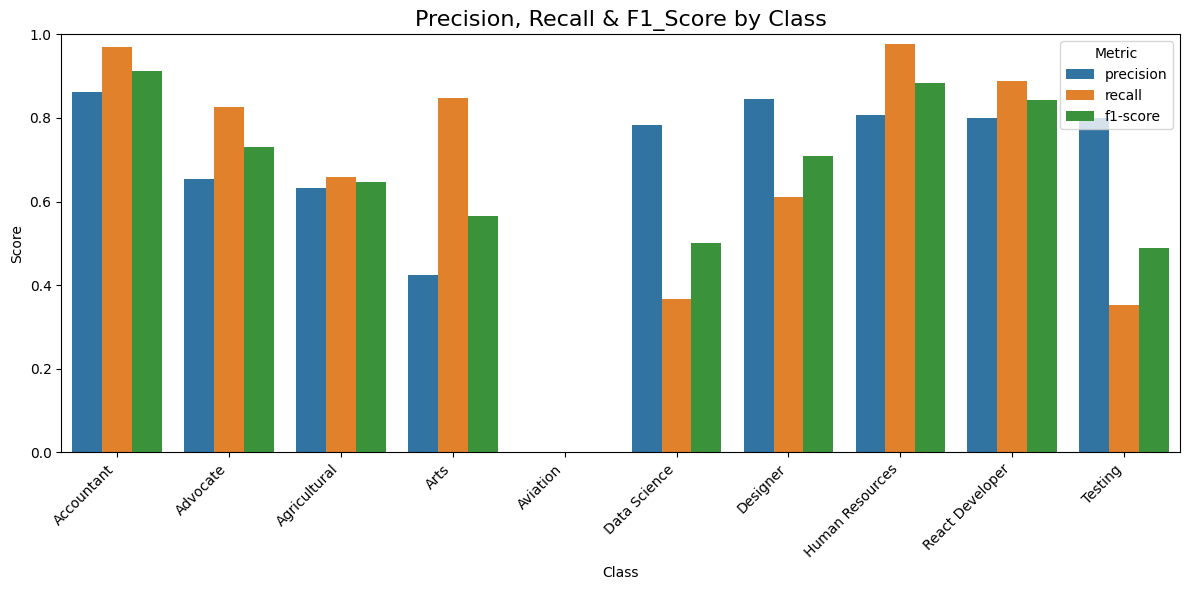

In [16]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# convert the report dictionary to a DataFrame
df_report = pd.DataFrame(report_dict).transpose().reset_index()
df_report = df_report.rename(columns={'index': 'class'})

# Filter only the classes(exclude 'accuracy', 'macro avg', 'weighted avg')
df_classes = df_report[~df_report['class'].isin(['accuracy', 'macro avg', 'weighted avg'])]

# Plotting the classification report
plt.figure(figsize=(12, 6))
df_classes_melted = df_classes.melt(id_vars='class', value_vars=["precision", "recall", "f1-score"])

sns.barplot(data=df_classes_melted, x="class", y="value", hue="variable")

plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)
plt.title("Precision, Recall & F1_Score by Class", fontsize=16)
plt.ylabel("Score")
plt.xlabel('Class')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0

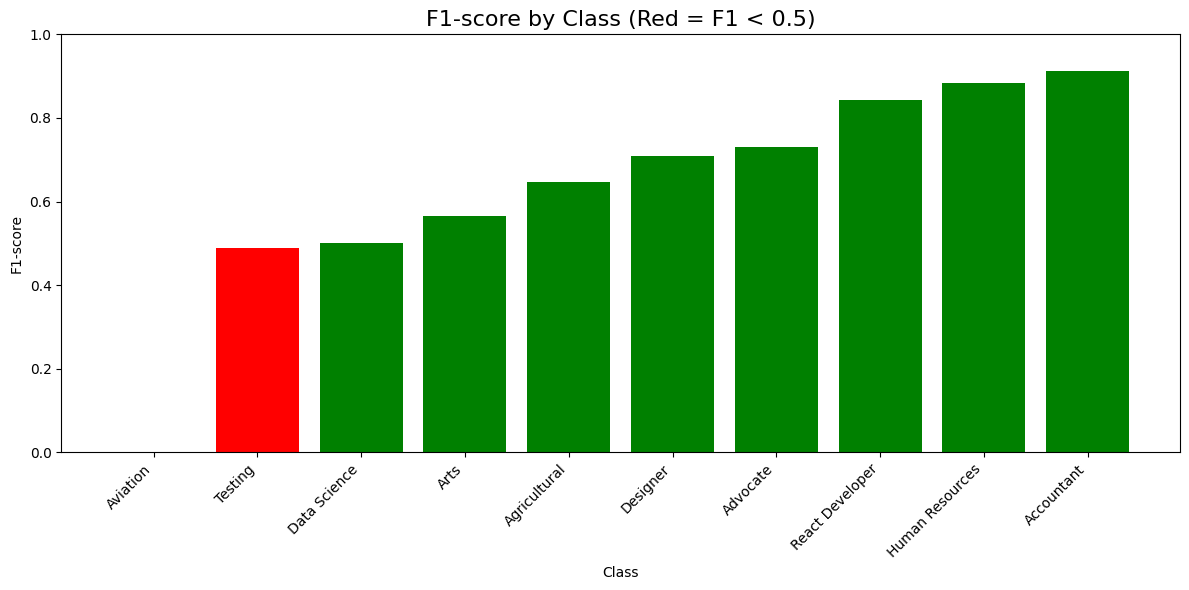

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report_dict).transpose().reset_index()
df_report = df_report.rename(columns={"index": "class"})

# Filter only actual classes
df_classes = df_report[~df_report['class'].isin(['accuracy', 'macro avg', 'weighted avg'])]

# Sort by F1-score
df_classes = df_classes.sort_values(by="f1-score", ascending=True)

# Crear una columna para el color (rojo si F1 < 0.5, gris si no)
df_classes["color"] = df_classes["f1-score"].apply(lambda x: "red" if x < 0.5 else "green")

# Graficar SOLO el F1-score con color personalizado
plt.figure(figsize=(12, 6))
bars = plt.bar(df_classes["class"], df_classes["f1-score"], color=df_classes["color"])

# Etiquetas y estilo
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.title("F1-score by Class (Red = F1 < 0.5)", fontsize=16)
plt.ylabel("F1-score")
plt.xlabel("Class")
plt.tight_layout()

# Mostrar gráfico
plt.show()


Accuracy: 0.8136986301369863

Classification Report:
                  precision    recall  f1-score   support

     Accountant       0.97      0.88      0.92        32
       Advocate       0.75      0.87      0.81        46
   Agricultural       0.77      0.79      0.78        47
           Arts       0.68      0.91      0.78        33
       Aviation       0.86      0.67      0.75         9
   Data Science       0.77      0.76      0.76        49
       Designer       0.82      0.64      0.72        36
Human Resources       0.93      0.86      0.89        43
React Developer       0.97      0.89      0.93        36
        Testing       0.77      0.79      0.78        34

       accuracy                           0.81       365
      macro avg       0.83      0.80      0.81       365
   weighted avg       0.82      0.81      0.81       365



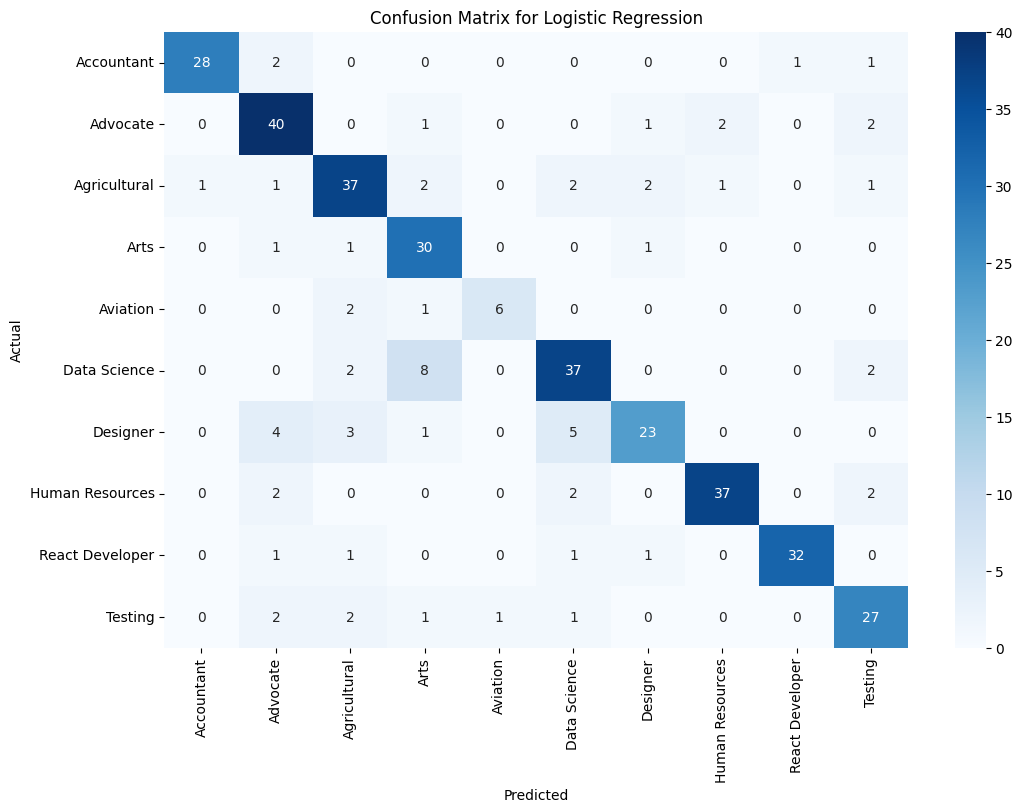

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot = True, fmt='d', cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

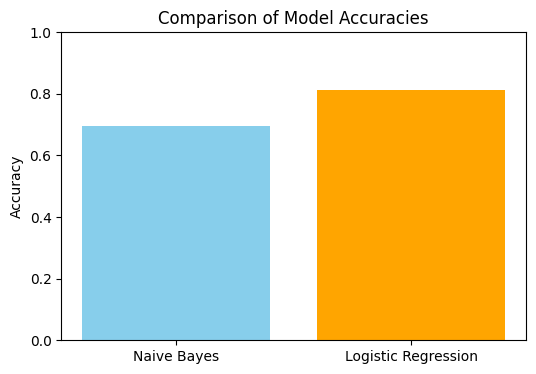

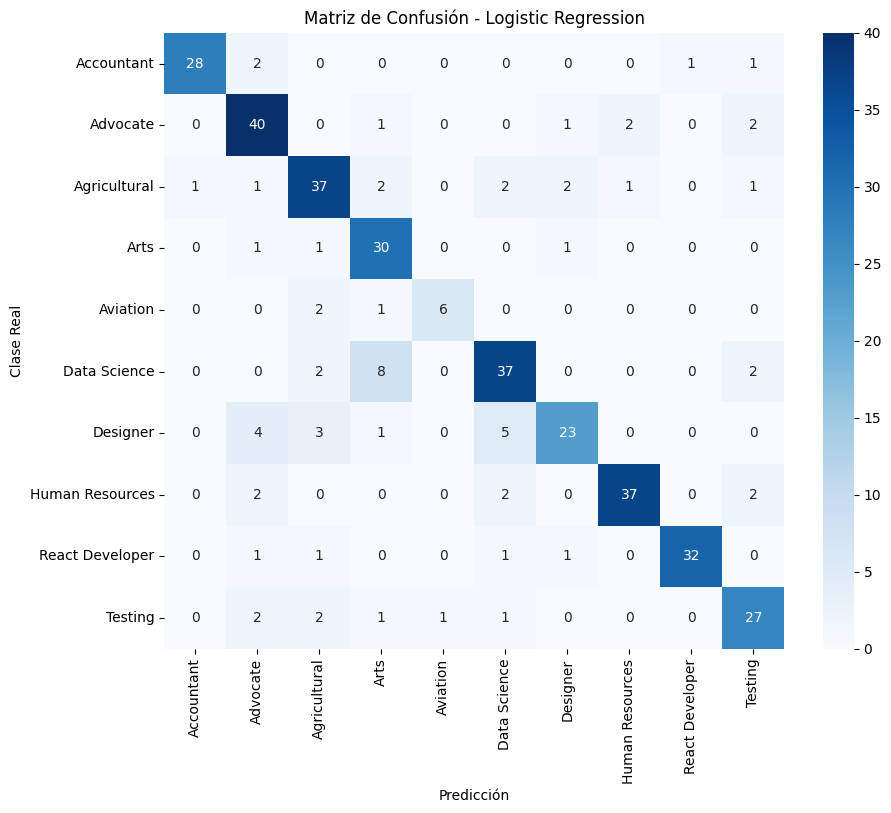

In [24]:
# Compare the two models by graphing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Previus results
accuracy_nb = 0.6959
accuracy_lr = 0.8137

# Comparetive between the accuracies
plt.figure(figsize=(6,4))
plt.bar(['Naive Bayes', 'Logistic Regression'], [accuracy_nb, accuracy_lr], color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

# === 2. Matriz de confusión para Logistic Regression ===
# Generamos matriz
cm = confusion_matrix(y_test, y_pred_log, labels=log_reg.classes_)

# Creamos un DataFrame para que seaborn lo maneje mejor
cm_df = pd.DataFrame(cm, index=log_reg.classes_, columns=log_reg.classes_)

# Graficamos la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Clase Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Logistic Regression')
plt.show()

## 📈 8. Evaluation

We use:
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix
- Classification Report

## 🔍 9. Interpretation

We explore the most relevant words per class and potential model biases.

## 📊 10. Visualization

Graphs that help communicate the model’s performance and dataset structure.

## ✅ 11. Conclusions

Key takeaways, strengths, limitations, and potential improvements.

## 🚀 12. Next Steps (Optional)

Ideas for future improvements:
- Use real resumes or larger datasets
- Deploy the model in a web app with Streamlit
- Add resume parsing (PDF, DOCX)